In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
df = pd.read_csv(r"C:\Users\Budha\Desktop\Data_Science\Capstone Project 1\Sub_Division_IMD_2017.csv")
df.info()
df.dropna(how='any', inplace=True)
# Any results you write to the current directory are saved as output.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
SUBDIVISION    4188 non-null object
YEAR           4188 non-null int64
JAN            4184 non-null float64
FEB            4185 non-null float64
MAR            4182 non-null float64
APR            4184 non-null float64
MAY            4185 non-null float64
JUN            4183 non-null float64
JUL            4181 non-null float64
AUG            4184 non-null float64
SEP            4182 non-null float64
OCT            4181 non-null float64
NOV            4177 non-null float64
DEC            4178 non-null float64
ANNUAL         4162 non-null float64
JF             4182 non-null float64
MAM            4179 non-null float64
JJAS           4178 non-null float64
OND            4175 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 621.7+ KB


In [11]:
####Total Number of and Names of Subdivisions

In [5]:
subdivs = df['SUBDIVISION'].unique()
num_of_subdivs = subdivs.size
print('Total # of Subdivs: ' + str(num_of_subdivs))
subdivs

Total # of Subdivs: 36


array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

In [ ]:
### last 7 years data 

In [6]:
years = [2010,2011,2012,2013,2014,2015,2016]
df = df[df.YEAR.isin(years)]
#yr_data.shape
#yr_data.head()
#yr_data.groupby('YEAR').sum()['ANNUAL'].plot(figsize=(12,8))

In [ ]:
#### Average Annual Rainfall in Each Subdivision

SUBDIVISION
Coastal Karnataka            3539.150000
Konkan & Goa                 3235.585714
Andaman & Nicobar Islands    3231.342857
Name: ANNUAL, dtype: float64
SUBDIVISION
Punjab                        510.628571
Haryana Delhi & Chandigarh    449.228571
West Rajasthan                388.057143
Name: ANNUAL, dtype: float64


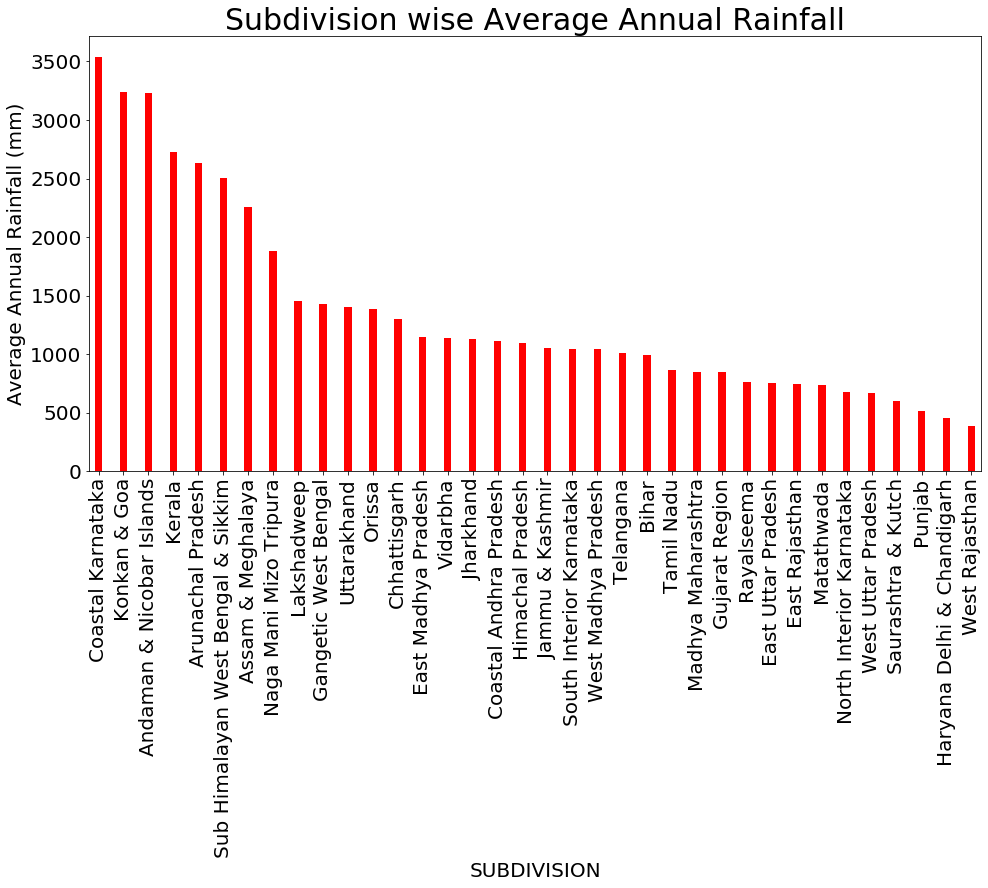

In [7]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot('bar', color='r',width=0.3,title='Subdivision wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print(df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[0,1,2]])
print(df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'][[33,34,35]])

In [ ]:
#####Total Rainfall in Each Year


Max: 53106.200000000004 ocurred in [2013]
Min: 43524.5 ocurred in [2012]
Mean: 48054.6


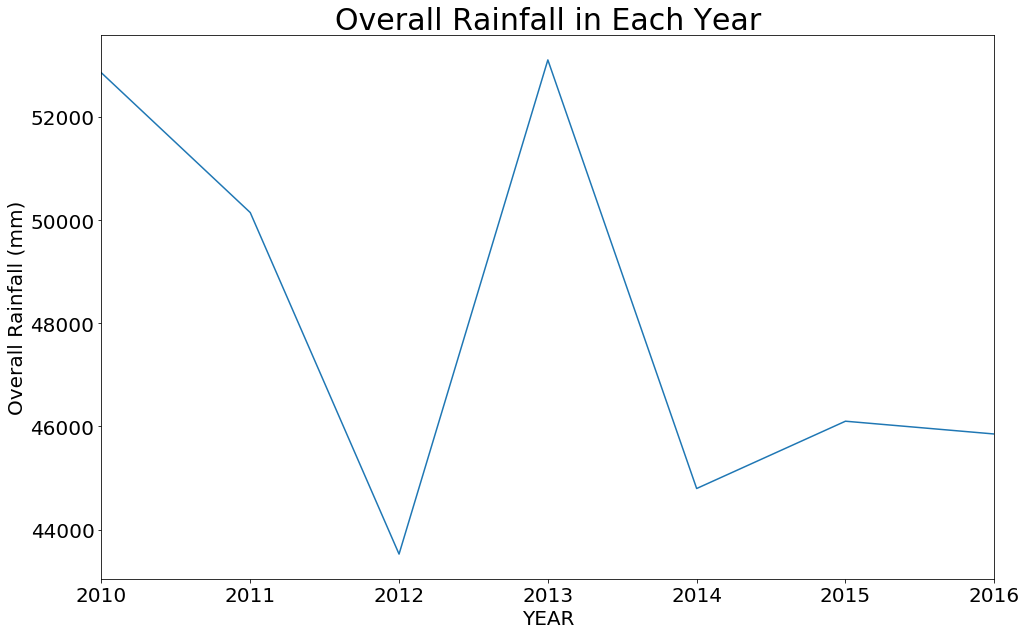

In [8]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df.groupby('YEAR').sum()['ANNUAL']
dfg.plot('line', title='Overall Rainfall in Each Year', fontsize=20)
#df.groupby('YEAR').sum()['ANNUAL'].plot()
#plt.xlim(0, 115)
#plt.xticks(np.linspace(0,115,24,endpoint=True),np.linspace(1900,2015,24,endpoint=True).astype(int))
#plt.xticks(np.linspace(1901,2015,24,endpoint=True))
#plt.xticks(rotation = 90)
plt.ylabel('Overall Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Min: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

In [ ]:
####Monthly Rainfalls Plot (Subdivision wise)

Max: 326.1482804232805 ocurred in ['JUL']
Max: 15.535780423280427 ocurred in ['JAN']
Mean: 112.40834986772484


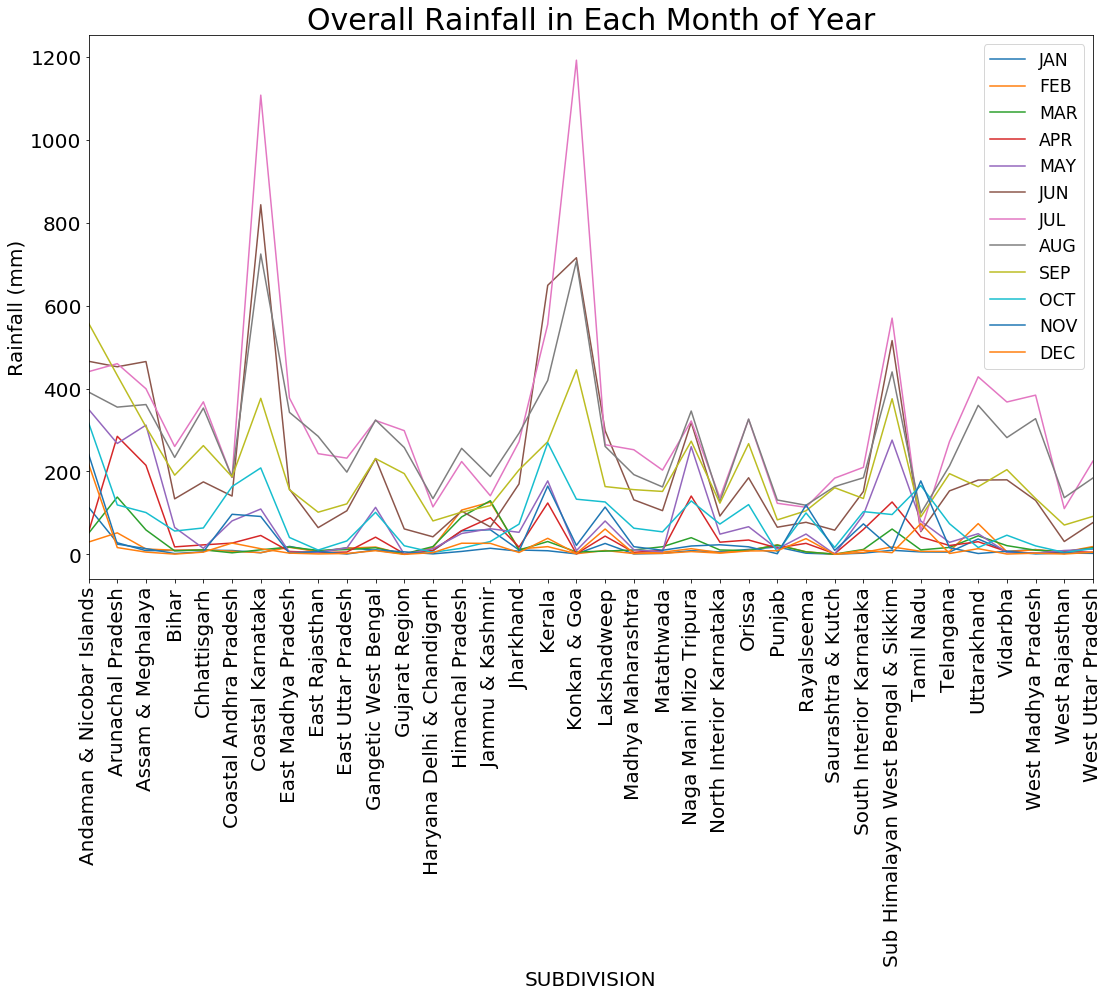

In [9]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = df['SUBDIVISION'].unique()
xlbls.sort()
dfg = df.groupby('SUBDIVISION').mean()[months]
dfg.plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

dfg = dfg.mean(axis=0)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

In [86]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [18]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
104,Andaman & Nicobar Islands,2010,101.7,8.0,0.7,12.5,319.0,448.9,521.9,563.8,263.3,402.4,268.5,246.4,3157.1,109.8,332.2,1797.8,917.3
105,Andaman & Nicobar Islands,2011,265.9,84.8,272.8,111.4,326.5,383.2,583.2,441.5,757.1,212.3,150.8,238.5,3828.0,350.7,710.7,2165.0,601.6
106,Andaman & Nicobar Islands,2012,119.9,45.6,30.9,55.8,533.9,458.2,317.3,369.6,868.9,209.7,300.5,187.3,3497.6,165.6,620.5,2014.0,697.5
107,Andaman & Nicobar Islands,2013,67.1,37.6,43.0,46.3,509.3,777.0,564.8,336.7,473.6,455.8,354.2,92.3,3757.8,104.7,598.6,2152.1,902.4
108,Andaman & Nicobar Islands,2014,41.9,8.6,0.0,11.1,238.0,416.6,467.6,321.6,412.9,402.6,201.2,100.4,2622.4,50.5,249.1,1618.7,704.2


In [19]:
df.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
4182,Lakshadweep,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


In [26]:
dfg.tail()

AUG    279.572685
SEP    202.309392
OCT     83.067791
NOV     37.550860
DEC     18.038757
dtype: float64

In [27]:
dfg2 = df.groupby('YEAR').sum()['ANNUAL']

In [28]:
dfg2.head()

YEAR
2010    52855.0
2011    50146.4
2012    43524.5
2013    53106.2
2014    44796.1
Name: ANNUAL, dtype: float64

In [29]:
dfg2.tail

<bound method NDFrame.tail of YEAR
2010    52855.0
2011    50146.4
2012    43524.5
2013    53106.2
2014    44796.1
2015    46101.0
2016    45853.0
Name: ANNUAL, dtype: float64>

In [75]:
dfg3 = df.groupby('YEAR').sum()['ANNUAL'].reset_index()
dfg3.head()


,YEAR,ANNUAL
0,2010,52855.0
1,2011,50146.4
2,2012,43524.5
3,2013,53106.2
4,2014,44796.1


In [77]:
dfg3.set_index('YEAR', inplace=True)
dfg3.head()

,ANNUAL
YEAR,
2010,52855.0
2011,50146.4
2012,43524.5
2013,53106.2
2014,44796.1


In [108]:
train4 = dfg3[:4]
test4 = dfg3[4:]

In [109]:
print(train4)
print(test4)

       ANNUAL
YEAR         
2010  52855.0
2011  50146.4
2012  43524.5
2013  53106.2
       ANNUAL
YEAR         
2014  44796.1
2015  46101.0
2016  45853.0


In [94]:
dfg3.tail

<bound method NDFrame.tail of        ANNUAL
YEAR         
2010  52855.0
2011  50146.4
2012  43524.5
2013  53106.2
2014  44796.1
2015  46101.0
2016  45853.0>

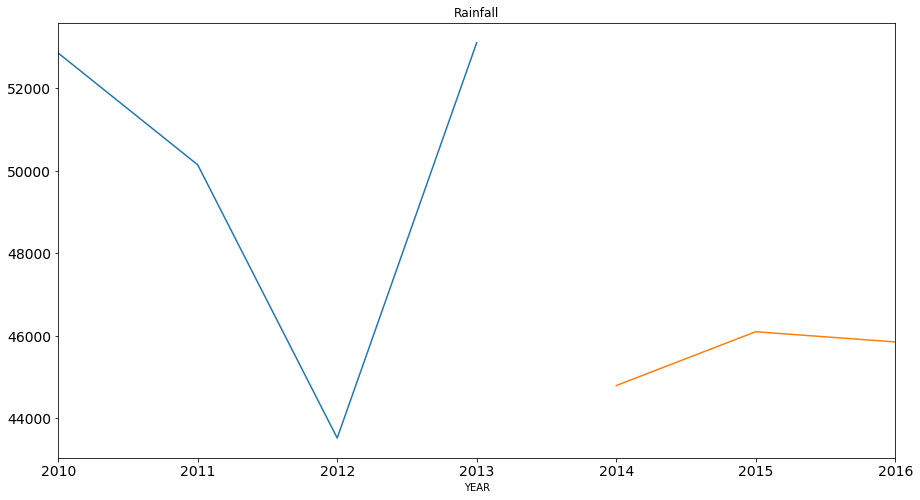

In [110]:
train4.ANNUAL.plot(figsize=(15,8), title= 'Rainfall', fontsize=14)
test4.ANNUAL.plot(figsize=(15,8), title= 'Rainfall', fontsize=14)
plt.show()

In [101]:
sm.tsa.seasonal_decompose(dfg3.index.YEAR).plot()
result = sm.tsa.stattools.adfuller(dfg3.index.YEAR)
plt.show()

AttributeError: 'Int64Index' object has no attribute 'YEAR'

In [106]:
#dfg2.columns = ['ANNUAL']



y_hat_avg = test4.copy()
fit1 = ExponentialSmoothing(np.asarray(train4['ANNUAL']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
print(fit1)
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test4))
print(y_hat_avg)
#plt.figure(figsize=(8,2))
#plt.subplot( train4['ANNUAL'], label='Train')
#plt.subplot(test4['ANNUAL'], label='Test')
#plt.subplot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
#plt.legend(loc='best')
#plt.show()

ValueError: operands could not be broadcast together with shapes (0,) (5,) 

In [104]:
y_hat_avg = test4.copy()
fit1 = sm.tsa.statespace.SARIMAX(train4.ANNUAL, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['ANNUAL'], label='Train')
plt.plot(test['ANNUAL'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

C:\Users\Budha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: maxlag should be < nobs

In [32]:
df_res_training.head()

,Residuals
0,207.459774
1,211.231177
2,187.498707
3,206.598812
4,83.465270


In [33]:
df_res_training.tail()

,Residuals
1809,97.627713
1810,108.101981
1811,75.849931
1812,72.332232
1813,46.129511


AttributeError: 'RangeIndex' object has no attribute 'inferred_freq'

In [43]:
df_train.head()

,x1,x2,x3,x4
0,18.8,0.0,1.2,35.6
1,5.1,2.8,3.1,85.9
2,26.2,34.4,37.5,5.3
3,2.2,0.5,3.7,87.1
4,59.6,12.1,3.2,2.6


In [44]:
df_train.tail()

,x1,x2,x3,x4
47,161.5,155.4,201.5,81.5
48,255.2,117.4,184.3,14.9
49,179.8,145.9,12.4,8.8
50,180.0,72.8,78.1,26.7
51,75.6,58.6,32.0,74.7


In [45]:
df_res.head()

,Residuals
0,192.562569
1,212.863609
2,54.582675
3,147.802986
4,160.076960


In [46]:
df_res.tail()

,Residuals
449,125.293642
450,154.415447
451,192.564858
452,38.172019
453,25.863141


In [50]:
train3 = df_res_training[:225]
test3 = df_res_training[226:]

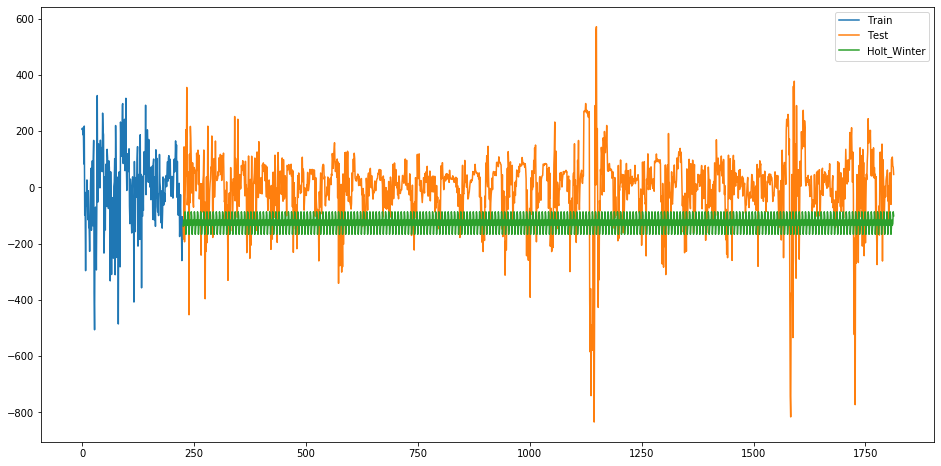

In [52]:
y_hat_avg = test3.copy()
fit1 = ExponentialSmoothing(np.asarray(train3['Residuals']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test3))
plt.figure(figsize=(16,8))
plt.plot( train3['Residuals'], label='Train')
plt.plot(test3['Residuals'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
train2 = df_res_training[:905]
test2 = df_res_training[906:]


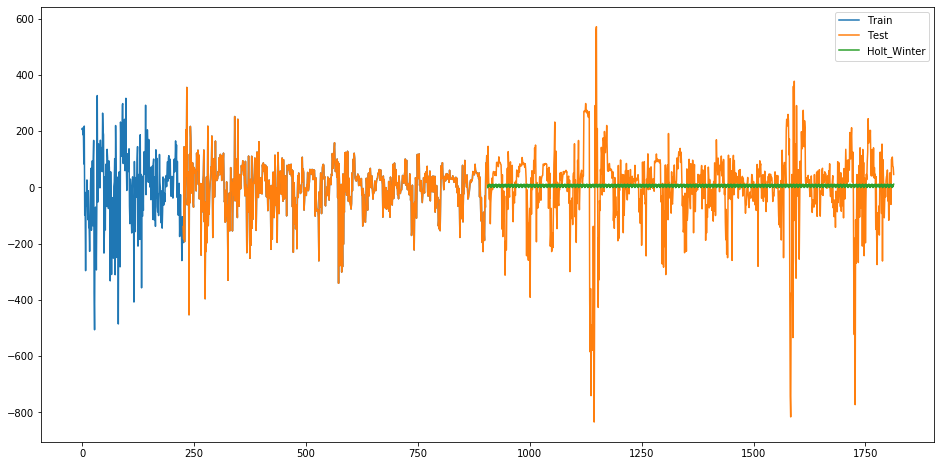

In [53]:
y_hat_avg = test2.copy()
fit1 = ExponentialSmoothing(np.asarray(train2['Residuals']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test2))
plt.figure(figsize=(16,8))
plt.plot( train2['Residuals'], label='Train')
plt.plot(test3['Residuals'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()